<a href="https://colab.research.google.com/github/arunavaangshuman/PDE/blob/main/qftansatztest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install cirq
!pip install -q qsimcirq --quiet
!python -m pip install scikit-quant

In [3]:
import numpy as np
import cirq
import skquant.opt as skqopt #optimization routines
from matplotlib import pyplot as plt #plotting tool

In [135]:
# alternative SO(4) different from what Peter suggests taken from this paper : https://arxiv.org/pdf/quant-ph/0308006v3.pdf
class AltSO4(cirq.Gate):
    #thetas := list of 6 variational parameters for this SO4 block
    def __init__(self, thetas, inverse=False):
        if (len(thetas)!=6):
            raise ValueError("thetas must be a list of 6 variational parameters")
        self.thetas=thetas
        self.inverse=inverse
    
    def _decompose_(self, q):
        #AltSO(4) gate object takes two qubits as input
        if (not self.inverse):
            yield cirq.rz(np.pi/2).on(q[0])
            yield cirq.rz(np.pi/2).on(q[1])
            yield cirq.ry(np.pi/2).on(q[1])
            yield cirq.CNOT(q[1], q[0])
            yield cirq.rz(self.thetas[0]).on(q[0])
            yield cirq.ry(self.thetas[1]).on(q[0])
            yield cirq.rz(self.thetas[2]).on(q[0])
            yield cirq.rz(self.thetas[3]).on(q[1])
            yield cirq.ry(self.thetas[4]).on(q[1])
            yield cirq.rz(self.thetas[5]).on(q[1])
            yield cirq.CNOT(q[1], q[0])
            yield cirq.rz(-np.pi/2).on(q[0])
            yield cirq.ry(-np.pi/2).on(q[1])
            yield cirq.rz(-np.pi/2).on(q[1])
            
            
        else:
            yield cirq.rz(-np.pi/2).on(q[0])
            yield cirq.ry(-np.pi/2).on(q[1])
            yield cirq.rz(-np.pi/2).on(q[1])
            yield cirq.CNOT(q[1], q[0])
            yield cirq.rz(-self.thetas[5]).on(q[1])
            yield cirq.ry(-self.thetas[4]).on(q[1])
            yield cirq.rz(-self.thetas[3]).on(q[1])
            yield cirq.rz(-self.thetas[2]).on(q[0])
            yield cirq.ry(-self.thetas[1]).on(q[0])
            yield cirq.rz(-self.thetas[0]).on(q[0])
            yield cirq.CNOT(q[1], q[0])
            yield cirq.rz(np.pi/2).on(q[0])
            yield cirq.ry(np.pi/2).on(q[1])
            yield cirq.rz(np.pi/2).on(q[1])
           
            
        
    def _num_qubits_(self):
        #We are required to implement this method, 
        #it specifies the number of qubits our gate acts on
        return 2
    
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(2))))
    

In [45]:
#creating SU(2) gate instead of Rz given in task list to see what advantage/ disadvantage it provides taken from the same paper in the above cell
class SU2(cirq.Gate):

    def __init__(self, thetas, inverse=False):
        if (len(thetas)!=3):
            raise ValueError("thetas must be a list of 6 variational parameters")
        self.thetas=thetas
        self.inverse=inverse

    def _num_qubits_(self):
        return 1

    def  decompose():
        if (not self.inverse):
            yield cirq.rz(self.thetas[0]).on(*q)
            yield cirq.ry(self.thetas[1]).on(*q)
            yield cirq.rz(self.thetas[2]).on(*q)
            
            
        else:

            yield cirq.rz(-self.thetas[2]).on(*q)
            yield cirq.ry(-self.thetas[1]).on(*q)
            yield cirq.rz(-self.thetas[0]).on(*q)
        
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(1))))                 

In [6]:
# creating SU(4) to compare with SO(4) and SU(4) includes imaginary terms also similarly taken from the same paper
class SU4(cirq.Gate):

    def __init__(self, thetas, inverse=False):
        if (len(thetas)!=15):
            raise ValueError("thetas must be a list of 6 variational parameters")
        self.thetas=thetas
        self.inverse=inverse

    def _num_qubits_(self):
        #We are required to implement this method, 
        #it specifies the number of qubits our gate acts on
        return 2

    def _decompose_(self, q):
        #AltSO(4) gate object takes two qubits as input
        if (not self.inverse):
          # circuit for A1
            yield cirq.rz(self.thetas[0]).on(q[0])
            yield cirq.ry(self.thetas[1]).on(q[0])
            yield cirq.rz(self.thetas[2]).on(q[0])
            yield cirq.rz(self.thetas[3]).on(q[1])
            yield cirq.ry(self.thetas[4]).on(q[1])
            yield cirq.rz(self.thetas[5]).on(q[1])
            yield cirq.CNOT(q[1], q[0])
            yield cirq.rz(self.thetas[6]).on(q[0])
            yield cirq.ry(self.thetas[7]).on(q[1])
            yield cirq.CNOT(q[0], q[1])
            yield cirq.ry(self.thetas[8]).on(q[1]) 
            yield cirq.CNOT(q[1], q[0]) 
            yield cirq.rz(self.thetas[9]).on(q[0])
            yield cirq.ry(self.thetas[10]).on(q[0])
            yield cirq.rz(self.thetas[11]).on(q[0])
            yield cirq.rz(self.thetas[12]).on(q[1])
            yield cirq.ry(self.thetas[13]).on(q[1])
            yield cirq.rz(self.thetas[14]).on(q[1])
            
        else:
            yield cirq.rz(-self.thetas[14]).on(q[1])
            yield cirq.ry(-self.thetas[13]).on(q[1])
            yield cirq.rz(-self.thetas[12]).on(q[1])
            yield cirq.rz(-self.thetas[11]).on(q[0])
            yield cirq.ry(-self.thetas[10]).on(q[0])
            yield cirq.rz(-self.thetas[9]).on(q[0])
            yield cirq.CNOT(q[1], q[0])
            yield cirq.rz(-self.thetas[8]).on(q[1])
            yield cirq.ry(-self.thetas[7]).on(q[1])
            yield cirq.CNOT(q[0], q[1])
            yield cirq.ry(-self.thetas[6]).on(q[0]) 
            yield cirq.CNOT(q[1], q[0]) 
            yield cirq.rz(-self.thetas[5]).on(q[1])
            yield cirq.ry(-self.thetas[4]).on(q[1])
            yield cirq.rz(-self.thetas[3]).on(q[1])
            yield cirq.rz(-self.thetas[2]).on(q[0])
            yield cirq.ry(-self.thetas[1]).on(q[0])
            yield cirq.rz(-self.thetas[0]).on(q[0])
             
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(2))))
    


In [136]:
class U(cirq.Gate):
    def __init__(self, n, d, l, inverse=False):
        #n := number of qubits
        #d := depth (number of layers)
        #l := list of variational parameters. Must be 6*(n-1)*d parameters
        #we specify the variational parameter when we declare a U gate object
        if (len(l)!=6*(n-1)*d):
            raise ValueError("Incorrect number of parameters. l must be of length 6*(n-1)*d")
        self.n=n
        self.d=d
        self.l=l
        self.inverse=inverse
    
    def _decompose_(self, q):
        #U gate object takes in n qubits as input
        if (not self.inverse):
            for i in range(self.d):
                for j in range(0, self.n-1, 2):
                    yield AltSO4(self.l[6*(self.n-1)*i+6*j:6*(self.n-1)*i+6*j+6]).on(q[j], q[j+1])
                for j in range(1, self.n-1, 2):
                    yield AltSO4(self.l[6*(self.n-1)*i+6*j:6*(self.n-1)*i+6*j+6]).on(q[j], q[j+1])
        else:
            for i in range(self.d-1, -1, -1):
                if (n%2==1):
                    for j in range(self.n-2, -1, -2):
                        yield AltSO4(self.l[6*(self.n-1)*i+6*j:6*(self.n-1)*i+6*j+6], True).on(q[j], q[j+1])
                    for j in range(self.n-3, -1, -2):
                        yield AltSO4(self.l[6*(self.n-1)*i+6*j:6*(self.n-1)*i+6*j+6], True).on(q[j], q[j+1])
                else:
                    for j in range(self.n-3, -1, -2):
                        yield AltSO4(self.l[6*(self.n-1)*i+6*j:6*(self.n-1)*i+6*j+6], True).on(q[j], q[j+1])
                    for j in range(self.n-2, -1, -2):
                        yield AltSO4(self.l[6*(self.n-1)*i+6*j:6*(self.n-1)*i+6*j+6], True).on(q[j], q[j+1])
                    
        
    def _num_qubits_(self):
        #We are required to implement this method, 
        #it specifies the number of qubits our gate acts on
        return self.n   
    
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(self.n))))

In [126]:
d=1
n=8

In [167]:
def checkwave(l,d,n):
    #create circuit object for adding gates to
    circuit = cirq.Circuit()
    #specify number of qubits we want in our circuit
    q = [cirq.GridQubit(0, i) for i in range(8)]
    
    #Add our custom gate class U to our circuit and make sure it acts
    #on all qubits *q
    
    circuit.append(U(n=6,d=1,l=l[1:d*6*(6-1)+1]).on(*q[2:]))
    
    # instead of SU2 writing the decomposed form of SU2

    param=d*6*(6-1)+1
    for i in range(2,n):
      for j in range(1):
        circuit.append(cirq.rz(l[param+j]).on(q[i]))
        circuit.append(cirq.ry(l[param+j+1]).on(q[i]))
        circuit.append(cirq.rz(l[param+j+2]).on(q[i]))
      param+=3
        
    #param=d*6*(6-1)+1
    #for i in range(2,n):
    #    circuit.append(cirq.rz(l[param]).on(q[i]))
    #    param+=1    
     
    #circuit.append(cirq.qft(*q)**-1) 
    circuit.append(cirq.qft(*q))
    #print(circuit)
    #Create simulator object
    simulator = cirq.Simulator()
    
    #Direct wavefunction access
    result = simulator.simulate(circuit).state_vector()
    
    #create final state 
    func = l[0]*np.real(result)
    return func

In [60]:
x0=np.concatenate(([10*np.random.random()],2*np.pi*np.random.rand(d*6*(4-1)+12)))

In [61]:
checkwave(x0,d,n)

array([ 0.04969806, -0.03660526,  0.12152197,  0.15812105,  0.00174582,
       -0.08842386,  0.01098561,  0.11794364,  0.07993183,  0.00894994,
        0.06486665,  0.19248098,  0.22321394,  0.1256149 ,  0.0113877 ,
       -0.04280699, -0.04891835, -0.01804348,  0.05785685,  0.13236795,
        0.11551183, -0.00964823, -0.14361115, -0.17561266, -0.10074093,
       -0.01671629, -0.02179796, -0.11370101, -0.17782652, -0.10100247,
        0.08169091,  0.19872546,  0.14658578,  0.02959412,  0.01661196,
        0.1041329 ,  0.14083868,  0.07500309,  0.0291225 ,  0.08316211,
        0.12990081,  0.05582936, -0.03620432,  0.06593146,  0.38105062,
        0.6650385 ,  0.6637255 ,  0.3707742 ,  0.03733499, -0.03445523,
        0.23601529,  0.5627931 ,  0.49971744, -0.06333242, -0.66629225,
       -0.7453274 , -0.3306914 , -0.0224925 , -0.18225968, -0.43757555,
       -0.2333368 ,  0.34470558,  0.6703961 ,  0.44260654], dtype=float32)

In [168]:
def f(l):
    x=np.linspace(0,1,2**n)
    return np.linalg.norm(checkwave(l,d,n)-np.sin(np.pi*x)-np.sin(2*np.pi*x))**2

In [169]:
bounds = [[0,20]] #first bound is lambda0, best choice of bounds usually
#depends on number of qubits we are using

#the rest of the bounds are the angle theta in Ry(theta)
for i in range(d*6*(6-1)+18):
    bounds.append([0,2*np.pi])

In [158]:
budget = 20000
print(len(bounds))

49


In [17]:
l=x0[1:d*6*(n-1)+1]
print(len(l)==6*(n-1)*d)

False


In [ ]:
x0=np.concatenate(([12*np.random.random()],2*np.pi*np.random.rand(d*6*(6-1)+18)))

#Optimize using Imfil
result, history = skqopt.minimize(f, x0, bounds, budget, method='imfil')

In [163]:
linit=result.optpar

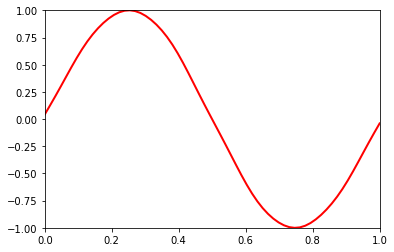

In [42]:
fig = plt.figure()
y=np.linspace(0,1,2**n)
ax = plt.axes(xlim=(0, 1), ylim=(-1, 1))
line, = ax.plot(y, checkwave(linit,d,n), 'r', lw=2)

(0, 0): ────────────────────────────────────────────────────────qft───
                                                                │
(0, 1): ────────────────────────────────────────────────────────#2────
                                                                │
(0, 2): ───<__main__.U object at 0x7f7149a01910>───Rz(2π)───────#3────
           │                                                    │
(0, 3): ───#2──────────────────────────────────────Rz(0.688π)───#4────
           │                                                    │
(0, 4): ───#3──────────────────────────────────────Rz(0.024π)───#5────
           │                                                    │
(0, 5): ───#4──────────────────────────────────────Rz(0.914π)───#6────
           │                                                    │
(0, 6): ───#5──────────────────────────────────────Rz(0)────────#7────
           │                                                    │
(0, 7): ───#6────────────────────────────

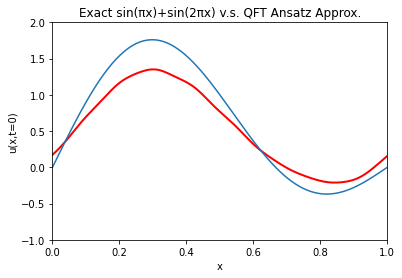

In [145]:
# got using rz only
fig = plt.figure()
y=np.linspace(0,1,2**n)
ax = plt.axes(xlim=(0, 1), ylim=(-1, 2))
line, = ax.plot(y, checkwave(linit,d,n), 'r', lw=2)
line2, = ax.plot(y, np.sin(np.pi*y)+np.sin(2*np.pi*y))
plt.xlabel('x')
plt.ylabel('u(x,t=0)')
plt.title('Exact sin(πx)+sin(2πx) v.s. QFT Ansatz Approx.')
plt.savefig('qftplot.png')

In [147]:
np.linalg.norm(checkwave(linit,d,n)-np.sin(np.pi*y)-np.sin(2*np.pi*y))

(0, 0): ────────────────────────────────────────────────────────qft───
                                                                │
(0, 1): ────────────────────────────────────────────────────────#2────
                                                                │
(0, 2): ───<__main__.U object at 0x7f7149673510>───Rz(2π)───────#3────
           │                                                    │
(0, 3): ───#2──────────────────────────────────────Rz(0.688π)───#4────
           │                                                    │
(0, 4): ───#3──────────────────────────────────────Rz(0.024π)───#5────
           │                                                    │
(0, 5): ───#4──────────────────────────────────────Rz(0.914π)───#6────
           │                                                    │
(0, 6): ───#5──────────────────────────────────────Rz(0)────────#7────
           │                                                    │
(0, 7): ───#6────────────────────────────

3.9789822290815864

(0, 0): ──────────────────────────────────────────────────────────────────────────────────qft───
                                                                                          │
(0, 1): ──────────────────────────────────────────────────────────────────────────────────#2────
                                                                                          │
(0, 2): ───<__main__.U object at 0x7f71525ae7d0>───Rz(1.11π)────Ry(0)────────Rz(1.35π)────#3────
           │                                                                              │
(0, 3): ───#2──────────────────────────────────────Rz(1.1π)─────Ry(1.0π)─────Rz(1.38π)────#4────
           │                                                                              │
(0, 4): ───#3──────────────────────────────────────Rz(2π)───────Ry(1.48π)────Rz(1.97π)────#5────
           │                                                                              │
(0, 5): ───#4──────────────────────────────────────Rz(2

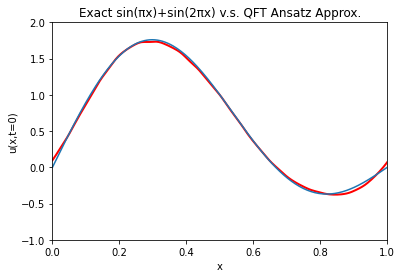

In [164]:
# with decomposed SU2
fig = plt.figure()
y=np.linspace(0,1,2**n)
ax = plt.axes(xlim=(0, 1), ylim=(-1, 2))
line, = ax.plot(y, checkwave(linit,d,n), 'r', lw=2)
line2, = ax.plot(y, np.sin(np.pi*y)+np.sin(2*np.pi*y))
plt.xlabel('x')
plt.ylabel('u(x,t=0)')
plt.title('Exact sin(πx)+sin(2πx) v.s. QFT Ansatz Approx.')
plt.savefig('qftplot.png')

In [165]:
np.linalg.norm(checkwave(linit,d,n)-np.sin(np.pi*y)-np.sin(2*np.pi*y))

(0, 0): ──────────────────────────────────────────────────────────────────────────────────qft───
                                                                                          │
(0, 1): ──────────────────────────────────────────────────────────────────────────────────#2────
                                                                                          │
(0, 2): ───<__main__.U object at 0x7f7152579910>───Rz(1.11π)────Ry(0)────────Rz(1.35π)────#3────
           │                                                                              │
(0, 3): ───#2──────────────────────────────────────Rz(1.1π)─────Ry(1.0π)─────Rz(1.38π)────#4────
           │                                                                              │
(0, 4): ───#3──────────────────────────────────────Rz(2π)───────Ry(1.48π)────Rz(1.97π)────#5────
           │                                                                              │
(0, 5): ───#4──────────────────────────────────────Rz(2

0.4022550433161921

In [171]:
# using SU2
param=[]
for i in range(10):
    x0=np.concatenate(([12*np.random.random()],2*np.pi*np.random.rand(d*6*(6-1)+18)))
    #Optimize using Imfil
    result, history = skqopt.minimize(f, x0, bounds, budget, method='imfil')
    ltrial=result.optpar
    param.append(ltrial)
    print(f(ltrial))

0.29341208126495716
0.11298723399963369
0.11039773973185649
0.9240905621092149
0.14054169116918877
0.14999758820201367
1.1419955264085628
0.8317558614786863
1.0336947881906584
0.1139312119584269


In [175]:
f(param[2])

0.11039773973185649

In [ ]:
# using rz only
param=[]
for i in range(10):
    x0=np.concatenate(([12*np.random.random()],2*np.pi*np.random.rand(d*6*(6-1)+18)))
    #Optimize using Imfil
    result, history = skqopt.minimize(f, x0, bounds, budget, method='imfil')
    ltrial=result.optpar
    param.append(ltrial)
    print(f(ltrial))